# Youssaf Menacer

Final Project: "Consumer Behaviour Analysis of Amazon"
    

# About

Amazon consumer Behaviour Dataset is a Kaggles' access free dataset. It contains 602 entries and 23 features explained as follows, 

1.age= age

2.gender= gender

3.Purchase_Frequency= How frequently do you make purchases on Amazon?

4.Purchase_Categories= What product categories do you typically purchase on Amazon?

5.Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon?

6.Browsing_Frequency =How often do you browse Amazon's website or app?

7.Product_Search_Method =How do you search for products on Amazon?

8.Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page?

9.Customer_Reviews_Importance =How important are customer reviews in your decision-making process?

10.Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon?

11.Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart?

12.Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart?

13.Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often?

14.Review_Left =Have you ever left a product review on Amazon?

15.Review_Reliability =How much do you rely on product reviews when making a purchase?

16.Review_Helpfulness =Do you find helpful information from other customers' reviews?

17.Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon?

18.Recommendation_Helpfulness =Do you find the recommendations helpful?

19.Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive

20.Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon?

23.Service_Appreciation =What aspects of Amazon's services do you appreciate the most?

24.Improvement_Areas =Are there any areas where you think Amazon can improve?

# Objective: 

Our objective here is to build models to predict the "Shopping_Satisfaction" of consumers using the given features. The target variable has 5 values, 

"Very Unsatisfied", "Unsatisfied", "Average", "Satisfied", and "Very Satisfied". 

In [1]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
amazon_data=pd.read_csv("Amazon_Customer_Behavior_Survey.csv")

# Print the first 5 rows:
amazon_data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [49]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [50]:
amazon_data.columns = amazon_data.columns.str.replace(' ', '_')

# **Pre Processing**

In [51]:
amazon_data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency_    0
Recommendation_Helpfulness                0
Rating_Accuracy_                          0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

We observe that amazon_data["Product_Search_Method"] has two missing entries.

In [52]:
amazon_data.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency_     int64
Recommendation_Helpfulness                object
Rating_Accuracy_                           int64
Shopping_Satisfactio

In [53]:
# Let us drop the first column as it does not affect our prediction
amazon_data.drop(['Timestamp'],inplace=True,axis=1)
amazon_data.head()

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency_,Recommendation_Helpfulness,Rating_Accuracy_,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [54]:
# For the missing entries, we fill them up using the mode
mode_value = amazon_data['Product_Search_Method'].mode()[0]
amazon_data['Product_Search_Method'].fillna(mode_value, inplace=True)
amazon_data.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency_    0
Recommendation_Helpfulness                0
Rating_Accuracy_                          0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [56]:
df1=amazon_data.copy()#copying df for clustering

In [57]:
# Check the number of unique variables in the "Gender" column
unique_values = amazon_data['Gender'].nunique()

print("Number of unique variables in the 'Gender' column:", unique_values,"which are",amazon_data['Gender'].unique())

Number of unique variables in the 'Gender' column: 4 which are ['Female' 'Prefer not to say' 'Male' 'Others']


In [58]:
# Let us do label encoding for amazon_data['Gender']

# Define the mapping for label encoding
label_mapping = {'Female': 0, 'Male': 1,'Prefer not to say': 2, 'Others': 3}

# Apply label encoding to the "Gender" column
amazon_data['Gender'] = amazon_data['Gender'].map(label_mapping)

# Print the updated DataFrame
amazon_data['Gender'].unique()

array([0, 2, 1, 3], dtype=int64)

In [59]:
#splliting age in to different catogories
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

# Create a new column 'Age Category' with the grouped age categories
amazon_data["age"] = pd.cut(amazon_data['age'], bins=bins, labels=labels, right=False)

In [60]:
# Similarly to amazon_data["Gender"], we use labelencoder for the other categorical features,
le=LabelEncoder()
lst=["age","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]
for i in lst:
  amazon_data[i]=le.fit_transform(amazon_data[i])

In [61]:
amazon_data.dtypes

age                                       int32
Gender                                    int64
Purchase_Frequency                        int32
Purchase_Categories                       int32
Personalized_Recommendation_Frequency     int32
Browsing_Frequency                        int32
Product_Search_Method                     int32
Search_Result_Exploration                 int32
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int32
Cart_Completion_Frequency                 int32
Cart_Abandonment_Factors                  int32
Saveforlater_Frequency                    int32
Review_Left                               int32
Review_Reliability                        int32
Review_Helpfulness                        int32
Personalized_Recommendation_Frequency_    int64
Recommendation_Helpfulness                int32
Rating_Accuracy_                          int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

In [62]:
amazon_data.head()

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency_,Recommendation_Helpfulness,Rating_Accuracy_,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,1,0,0,0,2,1,1,1,1,2,...,4,1,3,2,2,2,1,1,2,11
1,1,0,3,8,2,0,1,1,1,2,...,3,0,0,2,2,1,3,2,8,11
2,1,2,0,20,0,0,1,1,2,2,...,3,0,3,0,4,0,3,3,2,9
3,1,0,3,4,1,0,1,0,5,0,...,4,1,0,2,3,1,3,4,2,9
4,1,0,1,1,2,0,0,1,1,2,...,3,0,0,2,4,2,2,2,2,9


In [63]:
amazon_data.shape

(602, 22)

# **Exploratory Data Analysis**
Calculating features having high correlation


In [64]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = amazon_data.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
printed_pairs = set()  # Track printed feature pairs

for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2 and (feature1, feature2) not in printed_pairs and (feature2, feature1) not in printed_pairs:
        printed_pairs.add((feature1, feature2))
        print(f"{amazon_data.columns[feature1]} and {amazon_data.columns[feature2]} are highly correlated.")


Rating_Accuracy_ and Shopping_Satisfaction are highly correlated.


**Calculating features having low correlation**

In [19]:
#Calculate the correlation matrix
correlation_matrix = amazon_data.corr()

# Find features with low correlation
threshold = 0.0009  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features   
printed_pairs = set()
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2 and (feature1, feature2) not in printed_pairs and (feature2, feature1) not in printed_pairs:
        printed_pairs.add((feature1, feature2))
        print(f"{amazon_data.columns[feature1]} and {amazon_data.columns[feature2]} are low correlated.")        

Gender and Saveforlater_Frequency are low correlated.
Gender and Review_Left are low correlated.


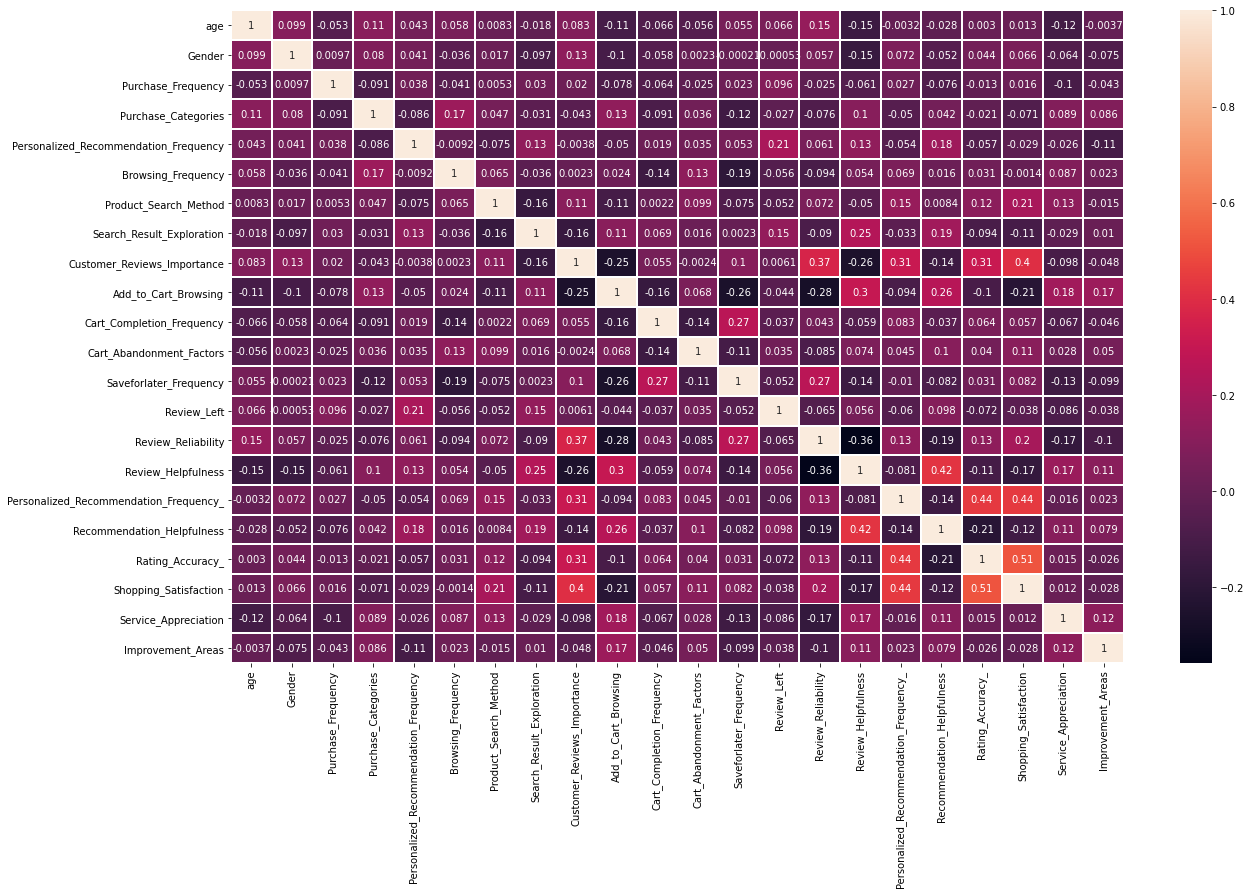

In [65]:
#heat map
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(amazon_data.corr(),annot=True,linewidths=1)
# Save the plot as an image
plt.savefig('heat_map.png')
plt.show()

<AxesSubplot:xlabel='Review_Reliability', ylabel='count'>

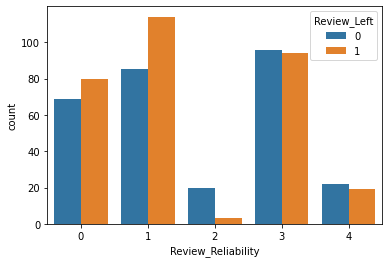

In [66]:
sns.countplot(x='Review_Reliability',data=amazon_data,hue='Review_Left')

0 represent the people who haven't left any review and 1 represent the ones who have left reviews

the people who relay on the review have a range of "Very Satisfied," "Satisfied," "Average," "Unsatisfied," and "Very Unsatisfied,"

Based on the graph, it appears that individuals who are satisfied with a product or service are more likely to leave a review. The graph shows that those who have rated their experience as "Very Satisfied" or "Satisfied" have a higher frequency of leaving reviews. On the other hand, individuals who are not satisfied or have average opinions are less likely to leave a review.

<AxesSubplot:xlabel='Gender', ylabel='count'>

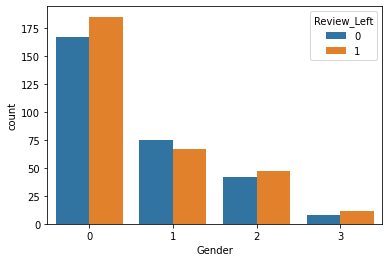

In [67]:
sns.countplot(x='Gender',data=amazon_data,hue='Review_Left')

We observe that females leave more reviews than other genders.

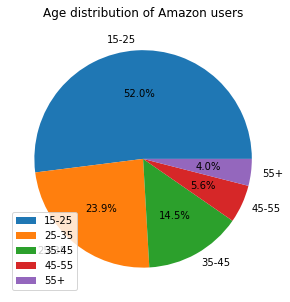

In [68]:
# Age distribution
y=amazon_data['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of Amazon users')
plt.savefig('Age_distribution_of_Amazon_users.png')
plt.show()

Based on the graph, it can be inferred that individuals in the age range of 15-25 have a higher level of user interaction compared to other age groups. This implies these users have more impact on the reviews than others.

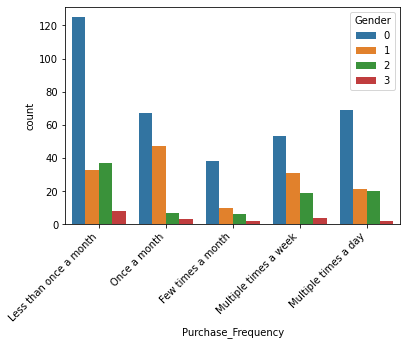

In [69]:
# Define the mapping for the x-axis labels
frequency_labels = {
    0: 'Less than once a month',
    1: 'Once a month',
    2: 'Few times a month',
    3: 'Multiple times a week',
    4: 'Multiple times a day'
}

# Plot the countplot
ax = sns.countplot(x='Purchase_Frequency', data=amazon_data, hue='Gender')

# Modify the x-axis labels
ax.set_xticklabels([frequency_labels[int(x.get_text())] for x in ax.get_xticklabels()], rotation=45, ha='right')
plt.savefig('Purchase_Frequency_of_Amazon_users.png')
# Show the plot
plt.show()

0 represent people who identify as females,1 represent people who identify as male,2 represent people who preffered not to tell their gender,3 represent people who identify in other genders. We clearly see females are the most active in shooping from amazon.

In [70]:
amazon_data.columns

Index(['age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency_',
       'Recommendation_Helpfulness', 'Rating_Accuracy_',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

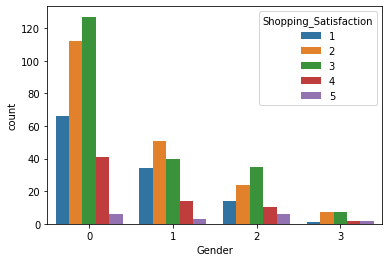

In [72]:
sns.countplot(x='Gender',data=amazon_data,hue='Shopping_Satisfaction')
plt.savefig('Shopping_Satisfaction')

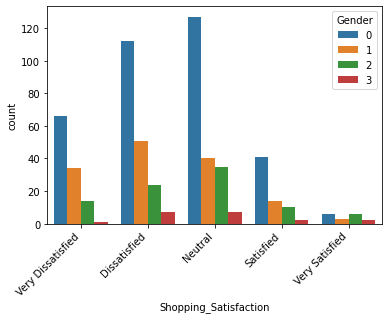

In [76]:
# Define the mapping for the x-axis labels
frequency_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Plot the countplot
ax = sns.countplot(x='Shopping_Satisfaction', data=amazon_data, hue='Gender')

# Modify the x-axis labels
ax.set_xticklabels([frequency_labels[int(x.get_text())] for x in ax.get_xticklabels()], rotation=45, ha='right')
plt.savefig('Shopping_Satisfaction_of_Amazon_users.png')
# Show the plot
plt.show()

# **Feature selection**

In [73]:
X=amazon_data.drop(["Shopping_Satisfaction"],axis=1)
y=amazon_data["Shopping_Satisfaction"]
X.shape,y.shape

((602, 21), (602,))

In [74]:
amazon_data['Shopping_Satisfaction'].value_counts()

3    209
2    194
1    115
4     67
5     17
Name: Shopping_Satisfaction, dtype: int64

**Selecting the best features for classification using ANOVA**

In [77]:
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = amazon_data[selected_features]
# Print the selected features
print(selected_features)

Index(['Browsing_Frequency', 'Product_Search_Method',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency_', 'Recommendation_Helpfulness',
       'Rating_Accuracy_'],
      dtype='object')


In [86]:
list1 = ['Browsing_Frequency', 'Product_Search_Method', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency_', 'Recommendation_Helpfulness', 'Rating_Accuracy_']
list2 = ['age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency_', 'Recommendation_Helpfulness', 'Rating_Accuracy_', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']

list2 = [element for element in list2 if element not in list1]
list2

['age',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Search_Result_Exploration',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Shopping_Satisfaction',
 'Service_Appreciation',
 'Improvement_Areas']

In [89]:
xnew=amazon_data.drop(['age','Gender','Purchase_Frequency','Purchase_Categories','Personalized_Recommendation_Frequency','Search_Result_Exploration','Cart_Abandonment_Factors','Saveforlater_Frequency','Review_Left','Shopping_Satisfaction','Service_Appreciation','Improvement_Areas'],axis=1)

In [90]:
sm=RandomOverSampler()
x,y=sm.fit_resample(xnew,y)

In [91]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.33333333, 0.33333333, 0.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.25      , 0.5       ,
        0.5       ],
       [0.        , 0.33333333, 0.25      , ..., 0.75      , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.        , 0.5       , ..., 1.        , 0.5       ,
        1.        ],
       [0.        , 0.33333333, 0.75      , ..., 0.5       , 1.        ,
        0.75      ],
       [0.        , 0.33333333, 0.75      , ..., 0.5       , 1.        ,
        0.75      ]])

In [92]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.3,random_state=4)

# **Model Building**

K Nearest Neighbors

In [93]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([5, 2, 5, 1, 5, 2, 1, 5, 4, 2, 1, 2, 3, 2, 5, 3, 1, 4, 5, 1, 2, 2,
       4, 2, 4, 1, 2, 2, 2, 4, 3, 5, 1, 1, 1, 2, 5, 3, 5, 3, 3, 3, 5, 4,
       3, 4, 1, 2, 5, 2, 3, 1, 2, 4, 3, 5, 5, 5, 3, 5, 3, 4, 1, 4, 2, 4,
       3, 3, 1, 4, 5, 3, 5, 2, 5, 2, 2, 2, 5, 4, 4, 4, 4, 3, 4, 4, 5, 1,
       4, 4, 1, 2, 1, 2, 2, 1, 5, 4, 3, 2, 1, 2, 3, 1, 5, 3, 3, 1, 2, 3,
       2, 4, 3, 5, 2, 3, 1, 3, 1, 1, 5, 1, 5, 5, 3, 5, 2, 4, 1, 5, 5, 3,
       1, 3, 1, 4, 3, 5, 4, 4, 2, 4, 5, 5, 4, 3, 4, 1, 5, 1, 4, 2, 1, 2,
       1, 2, 5, 1, 2, 4, 3, 3, 1, 1, 1, 5, 1, 5, 1, 5, 3, 2, 4, 1, 2, 3,
       4, 1, 1, 2, 4, 4, 3, 5, 1, 2, 4, 1, 1, 3, 5, 1, 5, 1, 4, 5, 1, 4,
       1, 4, 3, 3, 5, 2, 1, 5, 2, 4, 4, 3, 3, 2, 3, 2, 1, 5, 5, 1, 3, 5,
       2, 5, 2, 5, 4, 2, 1, 5, 2, 4, 1, 5, 1, 4, 3, 3, 1, 1, 1, 5, 4, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 4, 5, 4, 1, 2, 5, 4, 5, 3, 3, 5, 3,
       2, 5, 3, 3, 1, 4, 2, 4, 5, 2, 5, 3, 5, 4, 5, 3, 3, 5, 2, 3, 1, 3,
       1, 5, 1, 1, 4, 1, 4, 2, 2, 1, 5, 1, 4, 4, 4,

In [94]:
#hyper tuning for knn
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [95]:
print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}


In [115]:
knn1=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=7,weights='distance')
knn1.fit(X_train,y_train)
y_pred=knn1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.97      0.82        62
           2       0.65      0.43      0.52        60
           3       0.67      0.43      0.52        65
           4       0.78      0.90      0.84        71
           5       0.86      1.00      0.93        56

    accuracy                           0.75       314
   macro avg       0.73      0.75      0.72       314
weighted avg       0.73      0.75      0.72       314



 **SVC**

In [97]:
#hyper tuning for svc:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Create an SVC classifier
svc = SVC()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new SVC model with the best parameters
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_svc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best Score: 0.7127853881278539
Test Accuracy: 0.7484076433121019


In [116]:
sv=best_svc
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
y_pred1

array([5, 2, 5, 2, 1, 1, 1, 5, 4, 2, 2, 2, 4, 2, 5, 3, 2, 4, 5, 1, 2, 1,
       2, 4, 4, 1, 2, 2, 2, 4, 1, 5, 1, 1, 1, 4, 5, 3, 5, 2, 3, 3, 5, 4,
       3, 4, 2, 1, 5, 4, 3, 1, 2, 4, 2, 5, 2, 5, 3, 5, 4, 2, 1, 4, 2, 4,
       3, 3, 1, 4, 2, 4, 2, 2, 5, 2, 2, 2, 5, 3, 4, 4, 4, 4, 1, 4, 5, 2,
       1, 4, 2, 1, 3, 2, 2, 2, 5, 4, 2, 4, 1, 2, 1, 2, 5, 3, 3, 1, 3, 3,
       3, 4, 3, 5, 2, 3, 3, 3, 1, 1, 5, 2, 5, 5, 3, 5, 2, 4, 1, 2, 5, 3,
       2, 3, 2, 4, 4, 5, 2, 4, 2, 2, 5, 5, 2, 2, 4, 2, 5, 1, 3, 4, 2, 4,
       1, 2, 5, 3, 1, 3, 3, 3, 1, 1, 1, 5, 2, 5, 2, 5, 3, 2, 4, 2, 3, 3,
       4, 1, 2, 4, 4, 4, 3, 5, 2, 4, 4, 1, 1, 3, 5, 1, 5, 1, 4, 3, 1, 4,
       2, 3, 1, 4, 5, 2, 1, 5, 2, 2, 4, 2, 3, 2, 3, 2, 1, 5, 5, 1, 2, 5,
       3, 5, 1, 5, 2, 2, 1, 5, 3, 4, 2, 2, 1, 4, 2, 1, 2, 2, 4, 1, 4, 1,
       1, 2, 1, 3, 1, 3, 1, 1, 2, 3, 2, 5, 2, 2, 2, 1, 2, 1, 2, 3, 5, 3,
       2, 5, 3, 3, 2, 2, 2, 4, 5, 2, 5, 4, 5, 4, 5, 3, 3, 5, 4, 2, 1, 3,
       1, 5, 2, 2, 2, 2, 2, 4, 4, 1, 5, 2, 4, 4, 4,

In [117]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.91      0.82      0.86        62
           2       0.51      0.78      0.62        60
           3       0.49      0.38      0.43        65
           4       0.98      0.79      0.88        71
           5       0.97      1.00      0.98        56

    accuracy                           0.75       314
   macro avg       0.77      0.76      0.75       314
weighted avg       0.77      0.75      0.75       314



Gaussian NB

In [118]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([5, 2, 5, 1, 4, 1, 1, 5, 3, 2, 1, 2, 4, 2, 2, 3, 2, 5, 5, 1, 1, 2,
       4, 4, 3, 1, 1, 2, 2, 2, 5, 2, 1, 1, 1, 5, 5, 3, 5, 3, 3, 3, 5, 3,
       3, 3, 2, 1, 3, 2, 3, 1, 3, 5, 3, 2, 3, 5, 3, 3, 3, 5, 5, 5, 2, 1,
       3, 3, 2, 4, 5, 2, 2, 2, 5, 2, 1, 2, 5, 3, 5, 3, 3, 4, 1, 4, 5, 1,
       1, 4, 1, 1, 1, 2, 3, 2, 4, 4, 3, 4, 1, 1, 3, 2, 4, 3, 3, 1, 3, 3,
       2, 3, 3, 5, 2, 3, 1, 3, 1, 1, 5, 2, 5, 3, 3, 4, 3, 4, 1, 3, 5, 3,
       2, 4, 2, 4, 1, 5, 1, 5, 1, 2, 4, 5, 4, 3, 3, 1, 4, 1, 3, 2, 2, 4,
       1, 3, 5, 1, 1, 3, 3, 3, 1, 3, 1, 5, 1, 4, 2, 5, 3, 2, 4, 1, 2, 2,
       2, 1, 1, 1, 5, 4, 3, 4, 1, 4, 3, 1, 1, 3, 4, 3, 4, 2, 4, 3, 1, 4,
       1, 3, 4, 1, 5, 1, 3, 5, 5, 1, 4, 3, 3, 2, 3, 1, 1, 5, 2, 1, 5, 5,
       2, 5, 2, 5, 1, 2, 1, 4, 1, 5, 2, 3, 1, 3, 3, 3, 3, 2, 1, 4, 4, 1,
       1, 3, 1, 3, 2, 4, 3, 2, 1, 3, 2, 4, 4, 1, 3, 2, 3, 1, 1, 3, 5, 3,
       2, 5, 3, 3, 1, 4, 1, 5, 5, 1, 3, 4, 4, 3, 4, 3, 3, 4, 2, 2, 1, 3,
       1, 5, 2, 2, 1, 2, 3, 5, 4, 1, 4, 1, 4, 4, 3,

In [119]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.56      0.68      0.61        62
           2       0.37      0.35      0.36        60
           3       0.44      0.57      0.49        65
           4       0.49      0.32      0.39        71
           5       0.66      0.59      0.62        56

    accuracy                           0.50       314
   macro avg       0.50      0.50      0.50       314
weighted avg       0.50      0.50      0.49       314



**Decision tree**

In [102]:
#hyper tuning
# Define the parameter grid for GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15]}

# Create a DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new DecisionTreeClassifier with the best parameters
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_dtc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Best Score: 0.708610567514677
Test Accuracy: 0.7038216560509554


In [108]:
dt=best_dtc
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([5, 2, 5, 1, 1, 1, 2, 5, 4, 4, 1, 2, 4, 2, 5, 3, 2, 4, 5, 1, 2, 1,
       2, 4, 4, 1, 2, 4, 1, 4, 1, 5, 1, 1, 1, 4, 5, 1, 5, 3, 3, 4, 5, 4,
       3, 4, 4, 1, 5, 4, 3, 1, 1, 4, 2, 5, 1, 5, 5, 5, 4, 4, 1, 4, 2, 4,
       3, 3, 1, 4, 4, 4, 2, 1, 5, 1, 1, 1, 5, 3, 4, 4, 4, 4, 1, 4, 5, 1,
       1, 4, 3, 1, 3, 2, 3, 2, 5, 4, 5, 4, 1, 1, 1, 1, 5, 3, 2, 1, 3, 3,
       2, 4, 2, 5, 1, 4, 3, 4, 1, 1, 5, 1, 5, 5, 4, 5, 2, 4, 1, 2, 5, 2,
       2, 3, 2, 4, 4, 5, 1, 4, 1, 2, 5, 5, 1, 1, 4, 2, 5, 1, 4, 4, 4, 4,
       1, 2, 5, 3, 2, 3, 3, 3, 1, 1, 1, 5, 2, 5, 1, 5, 3, 1, 4, 4, 4, 1,
       4, 1, 2, 4, 4, 4, 4, 5, 2, 4, 4, 1, 1, 3, 5, 1, 5, 1, 4, 2, 1, 4,
       1, 3, 1, 4, 5, 1, 1, 5, 2, 3, 4, 3, 2, 4, 3, 2, 1, 5, 5, 1, 1, 5,
       3, 5, 3, 5, 2, 2, 1, 5, 3, 4, 3, 3, 1, 4, 3, 1, 1, 3, 4, 1, 4, 1,
       1, 4, 1, 3, 1, 2, 1, 1, 1, 3, 4, 5, 3, 1, 4, 1, 2, 1, 2, 2, 5, 3,
       3, 5, 4, 2, 3, 4, 4, 4, 5, 2, 5, 4, 5, 4, 5, 4, 4, 5, 4, 1, 1, 3,
       1, 5, 2, 1, 3, 1, 3, 4, 4, 1, 5, 1, 4, 4, 4,

In [109]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75        62
           2       0.49      0.35      0.41        60
           3       0.58      0.40      0.47        65
           4       0.78      0.89      0.83        71
           5       0.93      1.00      0.97        56

    accuracy                           0.70       314
   macro avg       0.68      0.70      0.68       314
weighted avg       0.68      0.70      0.68       314



**RandomForest Classifier**

In [105]:
#hyper tuning
param_grid = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2]}

# Create a RandomForestClassifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new RandomForestClassifier with the best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_rfc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7332308265772063
Test Accuracy: 0.7611464968152867


In [106]:
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([5, 2, 5, 1, 1, 1, 1, 5, 4, 2, 1, 2, 4, 2, 5, 3, 2, 4, 5, 1, 2, 1,
       4, 4, 4, 1, 2, 2, 3, 4, 1, 5, 1, 1, 1, 4, 5, 3, 5, 3, 3, 4, 5, 3,
       3, 4, 3, 1, 5, 4, 3, 1, 2, 4, 3, 5, 2, 5, 2, 5, 4, 3, 1, 4, 2, 4,
       3, 3, 1, 4, 4, 4, 2, 2, 5, 2, 1, 1, 5, 3, 4, 4, 4, 4, 1, 4, 5, 3,
       1, 4, 3, 1, 1, 2, 3, 2, 5, 4, 3, 4, 1, 4, 1, 1, 5, 3, 3, 1, 3, 3,
       2, 4, 3, 5, 1, 3, 1, 4, 1, 1, 5, 2, 5, 5, 4, 5, 2, 4, 1, 2, 5, 2,
       2, 3, 2, 4, 4, 5, 4, 4, 1, 2, 5, 5, 4, 1, 3, 1, 5, 1, 3, 4, 2, 4,
       1, 2, 5, 1, 3, 3, 1, 3, 1, 1, 1, 5, 2, 5, 2, 5, 3, 2, 4, 1, 3, 3,
       4, 1, 2, 4, 4, 4, 4, 5, 3, 4, 4, 1, 1, 3, 5, 1, 5, 1, 4, 3, 1, 4,
       2, 3, 3, 4, 5, 2, 1, 5, 2, 1, 4, 2, 2, 2, 1, 2, 1, 5, 5, 1, 3, 5,
       2, 5, 2, 5, 1, 2, 1, 5, 3, 4, 2, 3, 1, 4, 3, 1, 1, 2, 4, 1, 4, 2,
       1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 4, 5, 3, 1, 2, 1, 2, 1, 1, 3, 5, 3,
       3, 5, 4, 3, 1, 4, 2, 4, 5, 2, 5, 4, 5, 4, 5, 3, 4, 5, 4, 2, 1, 3,
       1, 5, 2, 2, 1, 3, 3, 4, 4, 1, 5, 1, 4, 4, 4,

In [107]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        62
           2       0.63      0.57      0.60        60
           3       0.60      0.52      0.56        65
           4       0.87      0.83      0.85        71
           5       0.97      1.00      0.98        56

    accuracy                           0.76       314
   macro avg       0.75      0.76      0.76       314
weighted avg       0.75      0.76      0.75       314



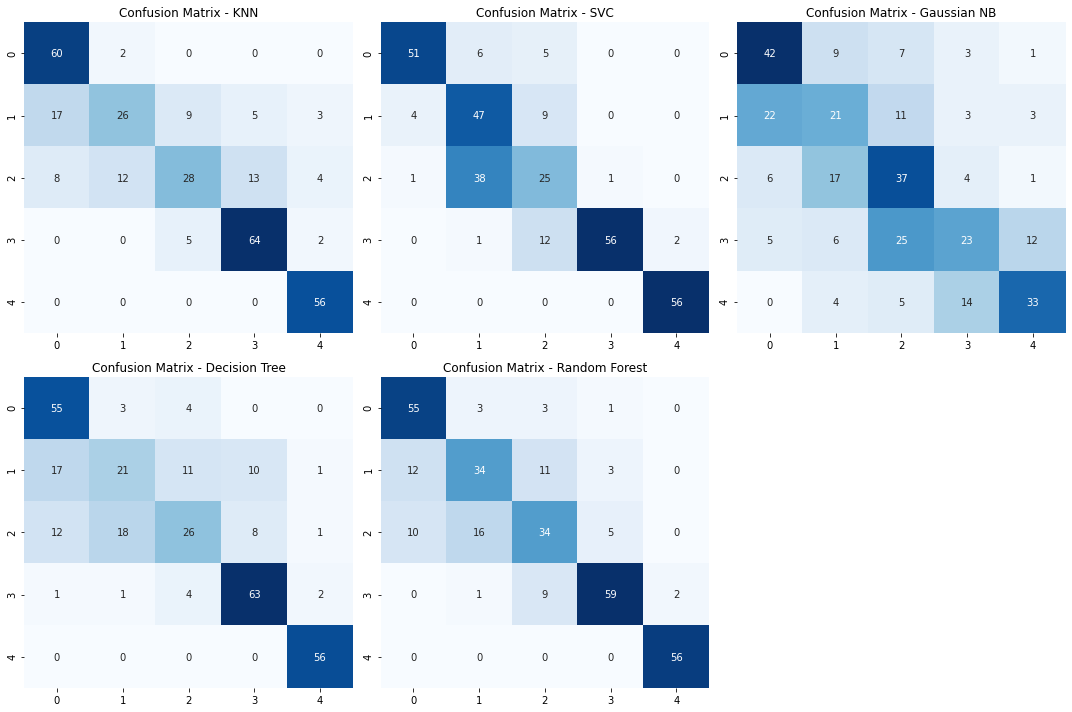

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.71      0.97      0.82        62
           2       0.65      0.43      0.52        60
           3       0.67      0.43      0.52        65
           4       0.78      0.90      0.84        71
           5       0.86      1.00      0.93        56

    accuracy                           0.75       314
   macro avg       0.73      0.75      0.72       314
weighted avg       0.73      0.75      0.72       314

Classification Report - SVC
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        62
           2       0.51      0.78      0.62        60
           3       0.49      0.38      0.43        65
           4       0.98      0.79      0.88        71
           5       0.97      1.00      0.98        56

    accuracy                           0.75       314
   macro avg       0.77      0.76      0.75       314
weighted avg       0.

In [120]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix and classification report for KNN
cm_knn = confusion_matrix(y_test, y_pred)
cr_knn = classification_report(y_test, y_pred)

# Confusion matrix and classification report for SVC
cm_svc = confusion_matrix(y_test, y_pred1)
cr_svc = classification_report(y_test, y_pred1)

# Confusion matrix and classification report for Gaussian NB
cm_nb = confusion_matrix(y_test, y_pred2)
cr_nb = classification_report(y_test, y_pred2)

# Confusion matrix and classification report for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred3)
cr_dt = classification_report(y_test, y_pred3)

# Confusion matrix and classification report for Random Forest
cm_rf = confusion_matrix(y_test, y_pred4)
cr_rf = classification_report(y_test, y_pred4)

# Plotting confusion matrices
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - KNN")

plt.subplot(2, 3, 2)
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - SVC")

plt.subplot(2, 3, 3)
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Gaussian NB")

plt.subplot(2, 3, 4)
sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Decision Tree")

plt.subplot(2, 3, 5)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Random Forest")

plt.tight_layout()
plt.savefig('Models_performances')
plt.show()

# Printing classification reports
print("Classification Report - KNN")
print(cr_knn)

print("Classification Report - SVC")
print(cr_svc)

print("Classification Report - Gaussian NB")
print(cr_nb)

print("Classification Report - Decision Tree")
print(cr_dt)

print("Classification Report - Random Forest")
print(cr_rf)


Higest accuracy is in random forest

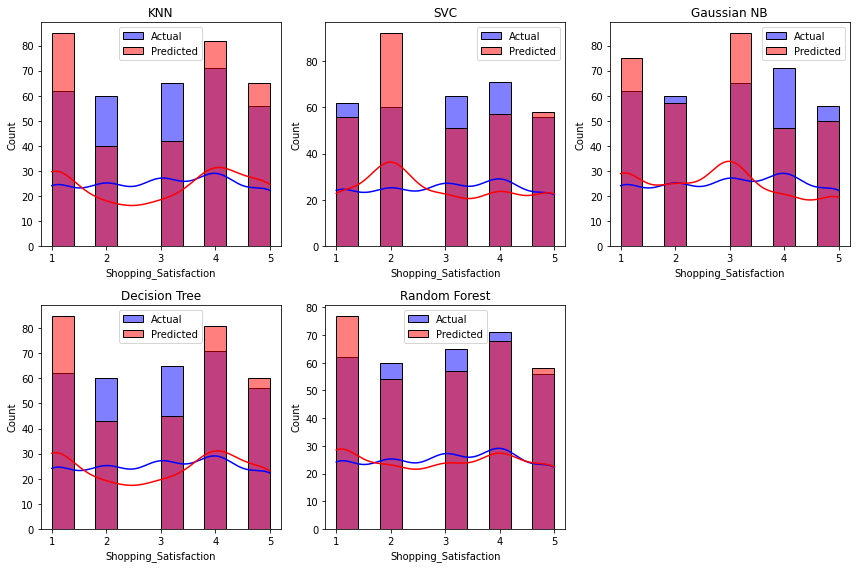

In [121]:
# Plotting the predicted values for each model compared to y_test
models = ['KNN', 'SVC', 'Gaussian NB', 'Decision Tree', 'Random Forest']
predictions = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4]

plt.figure(figsize=(12, 8))
for i in range(len(models)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(y_test, color='b', label='Actual', alpha=0.5, kde=True)
    sns.histplot(predictions[i], color='r', label='Predicted', alpha=0.5, kde=True)
    plt.title(models[i])
    plt.legend()

plt.tight_layout()
plt.savefig('Models_performances_1')
plt.show()

Here, the shopping satisfaction has a value range of 1 to 5, representing "Very Satisfied," "Satisfied," "Average," "Unsatisfied," and "Very Unsatisfied," respectively. 